In [1]:
import pandas as pd
import re
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import unicodedata

In [2]:
df=pd.read_csv("anuncios_completo.csv")

In [3]:
def limpiar_numero(texto):
    if isinstance(texto, str):
        match = re.search(r'[\d\.]+', texto)
        if match:
            num_str = match.group(0).replace('.', '')
            return int(num_str)
    return np.nan

def procesar_precios(df):
    df = df.copy()
    
    df['precios'] = df['precios'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    def extraer_precio_texto(precios_lista, clave):
        if isinstance(precios_lista, list):
            for item in precios_lista:
                if clave in item:
                    return item
        return np.nan
    
    df['precio_contado'] = df['precios'].apply(lambda x: extraer_precio_texto(x, "Precio al contado:"))
    df['precio_financiado'] = df['precios'].apply(lambda x: extraer_precio_texto(x, "Precio financiado:"))
    df['precio_nuevo'] = df['precios'].apply(lambda x: extraer_precio_texto(x, "Precio de venta nuevo*"))
    
    df['precio_contado'] = df['precio_contado'].apply(limpiar_numero)
    df['precio_financiado'] = df['precio_financiado'].apply(limpiar_numero)
    df['precio_nuevo'] = df['precio_nuevo'].apply(limpiar_numero)
    
    df.drop(columns=['precios'], inplace=True)
    
    return df

df = procesar_precios(df)

In [4]:
def precio_limpieza(df):
    def corregir_precio_contado(row):
        if "desde" in str(row["id_extraccion"]):
            return row["precio_financiado"]
        return row["precio_contado"]

    df["precio_contado"] = df.apply(corregir_precio_contado, axis=1)


    return df

df = precio_limpieza(df)

In [5]:
df = df.dropna(subset=['precio_contado']).reset_index(drop=True)

In [6]:
def limpiar_tags(df):
    def parse_list(val):
        if isinstance(val, list):
            return val
        try:
            return ast.literal_eval(val)
        except:
            return []

    df = df.copy()
    df['tags'] = df['tags'].apply(parse_list)

    def extraer_año(tags):
        for t in tags:
            if isinstance(t, str) and re.match(r'^\d{4}$', t):
                return int(t)
        return np.nan

    def extraer_combustible(tags):
        combustibles = {'Gasolina', 'Diésel', 'Eléctrico', 'Híbrido', 'Híbrido Enchufable', 'Gas'}
        for t in tags:
            if t in combustibles:
                return t
        return np.nan

    def extraer_kilometraje(tags):
        for t in tags:
            if isinstance(t, str):
                m = re.match(r'^([\d\.]+) km$', t)
                if m:
                    return float(m.group(1).replace('.', ''))
        return np.nan

    def extraer_ubicacion(tags):
        if tags:
            return tags[-1]
        return np.nan

    df['año'] = df['tags'].apply(extraer_año)
    df['combustible'] = df['tags'].apply(extraer_combustible)
    df['kilometraje'] = df['tags'].apply(extraer_kilometraje)
    df['ubicacion'] = df['tags'].apply(extraer_ubicacion)

    df.drop(columns=['tags'], inplace=True)

    return df

df = limpiar_tags(df)



In [7]:
def quitar_tildes(texto):
    if isinstance(texto, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', texto)
            if unicodedata.category(c) != 'Mn'
        )
    return texto

df['ubicacion'] = df['ubicacion'].apply(quitar_tildes)


In [ ]:
coordenadas_ubicaciones = {
    'Madrid': (40.4168, -3.7038),
    'Barcelona': (41.3851, 2.1734),
    'Malaga': (36.7213, -4.4214),
    'Islas Baleares': (39.5696, 2.6502),  
    'Alicante': (38.3452, -0.4810),
    'Vizcaya': (43.2630, -2.93499),
    'Castellon': (39.9864, -0.0513),
    'Avila': (40.6560, -4.7003),
    'Asturias': (43.3619, -5.8494),
    'Badajoz': (38.8794, -6.9707),
    'Valencia': (39.4699, -0.3763),
    'Tenerife': (28.2916, -16.6291),
    'Cordoba': (37.8882, -4.7794),
    'Alava': (42.8513, -2.6721),
    'Tarragona': (41.1189, 1.2445),
    'Girona': (41.9794, 2.8214),
    'Caceres': (39.4702, -6.3723),
    'Las Palmas': (28.1235, -15.4363),
    'Toledo': (39.8628, -4.0273),
    'Zaragoza': (41.6488, -0.8891),
    'Orense': (42.3400, -7.8633),
    'Cadiz': (36.5271, -6.2886),
    'Segovia': (40.9486, -4.1186),
    'Guipuzcoa': (43.3130, -1.9746),
    'Leon': (42.5987, -5.5671),
    'Cantabria': (43.1828, -3.9871),
    'Lleida': (41.6176, 0.6200),
    'Ciudad Real': (38.9860, -3.9279),
    'Pontevedra': (42.4333, -8.6333),
    'Salamanca': (40.9701, -5.6635),
    'Valladolid': (41.6523, -4.7245),
    'Palencia': (42.0090, -4.5271),
    'Almeria': (36.8340, -2.4637),
    'Huelva': (37.2614, -6.9447),
    'Sevilla': (37.3891, -5.9845),
    'Lugo': (43.0125, -7.5559),
    'Granada': (37.1773, -3.5986),
    'Huesca': (42.1401, -0.4089),
    'Murcia': (37.9922, -1.1307),
    'La Coruna': (43.3623, -8.4115),
    'Burgos': (42.3439, -3.6969),
    'Albacete': (38.9943, -1.8564),
    'La Rioja': (42.4627, -2.4450),
    'Cuenca': (40.0704, -2.1374),
    'Jaen': (37.7796, -3.7849),
    'Navarra': (42.6951, -1.6761),
    'Zamora': (41.5031, -5.7455),
    'Guadalajara': (40.6333, -3.1667),
    'Soria': (41.7636, -2.4679),
    'Teruel': (40.3440, -1.1069),
    'Melilla': (35.2912, -2.9381),
    'Ceuta': (35.8894, -5.3213)
}


df['latitud'] = df['ubicacion'].map(lambda x: coordenadas_ubicaciones.get(x, (None, None))[0])
df['longitud'] = df['ubicacion'].map(lambda x: coordenadas_ubicaciones.get(x, (None, None))[1])

In [9]:
def asegurar_lista(valor):
    if isinstance(valor, list):
        return valor
    elif isinstance(valor, str):
        try:
            lista = ast.literal_eval(valor)
            if isinstance(lista, list):
                return lista
            else:
                return []
        except:
            return []
    else:
        return []

def extraer_garantia_num(detalles):
    detalles = asegurar_lista(detalles)
    for detalle in detalles:
        if "Garantía:" in detalle:
            no_match = re.search(r'Garantía:\s*No', detalle, re.IGNORECASE)
            si_match = re.search(r'Garantía:\s*Sí', detalle, re.IGNORECASE)
            meses_match = re.search(r'Garantía:\s*(\d+)\s*meses?', detalle, re.IGNORECASE)
            if no_match:
                return pd.NA
            elif si_match:
                return 0
            elif meses_match:
                return int(meses_match.group(1))
    return pd.NA

def normalizar_texto(texto):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', texto)
        if not unicodedata.combining(c)
    ).lower().strip()

def extraer_transmision(detalles):
    detalles = asegurar_lista(detalles)
    for detalle in detalles:
        detalle_norm = normalizar_texto(detalle)
        if detalle_norm == "automatico":
            return "Automático"
        elif detalle_norm == "manual":
            return "Manual"
    return None

def extraer_matriculacion(detalles):
    detalles = asegurar_lista(detalles)
    for item in detalles:
        m = re.search(r'Matriculado: (\d{2}/\d{4})', item)
        if m:
            return m.group(1)
    return np.nan

def extraer_potencia(detalles):
    detalles = asegurar_lista(detalles)
    for item in detalles:
        m = re.search(r'(\d+)\s?cv', item, re.IGNORECASE)
        if m:
            return int(m.group(1))
    return np.nan

def extraer_puertas(detalles):
    detalles = asegurar_lista(detalles)
    for item in detalles:
        m = re.search(r'(\d+)\sPuertas', item)
        if m:
            return int(m.group(1))
    return np.nan

def extraer_asientos(detalles):
    detalles = asegurar_lista(detalles)
    for item in detalles:
        m = re.search(r'(\d+)\s?asientos', item, re.IGNORECASE)
        if m:
            return int(m.group(1))
    return np.nan

def extraer_tipo_carroceria(detalles):
    detalles = asegurar_lista(detalles)
    tipo_carroceria = None

    for item in detalles:
        if item in ['Descapotable o convertible', 'Descapotable']:
            tipo_carroceria = 'Descapotable'
        elif item in ['Berlina mediana o grande', 'Berlina']:
            tipo_carroceria = 'Berlina'
        elif item in ['Deportivo o coupé', 'Deportivo', 'Coupé']:
            tipo_carroceria = 'Deportivo'
        elif item in ['Todo Terreno', 'Stationwagon', 'Monovolumen', 'SUV', 'Familiar', 'Pickup', '4x4', 
                      '4x4, SUV o pickup', 'Pequeño', 'Sedán', 'Hatchback', 'Convertible']:
            tipo_carroceria = item
        elif item == 'Pequeño':
            tipo_carroceria = 'Pequeño'
        elif item == 'Convertible':
            tipo_carroceria = 'Convertible'

    return tipo_carroceria


def extraer_mes_matriculacion(detalles):
    detalles = asegurar_lista(detalles)
    for detalle in detalles:
        match = re.search(r'Matriculado:\s*(\d{2})/\d{4}', detalle)
        if match:
            return int(match.group(1))
    return None

def procesar_detalles_ficha(df):
    df = df.copy()

    df['garantia'] = df['detalles_ficha'].apply(extraer_garantia_num).astype('Int64')
    df['transmision'] = df['detalles_ficha'].apply(extraer_transmision)
    df['matriculacion'] = df['detalles_ficha'].apply(extraer_matriculacion)
    df['potencia_cv'] = df['detalles_ficha'].apply(extraer_potencia)
    df['puertas'] = df['detalles_ficha'].apply(extraer_puertas)
    df['asientos'] = df['detalles_ficha'].apply(extraer_asientos)
    df['tipo_carroceria'] = df['detalles_ficha'].apply(extraer_tipo_carroceria)
    df['mes'] = df['detalles_ficha'].apply(extraer_mes_matriculacion)
    df.drop(columns=['detalles_ficha'], inplace=True)

    return df

df = procesar_detalles_ficha(df)


In [10]:
def extra(df):
    df['año'] = df['año'].astype('Int64')
    df['mes'] = df['mes'].astype('Int64')
    df['timestamp_extraccion'] = pd.to_datetime(df['timestamp_extraccion'], errors='coerce')
    df['modelo'] = df.apply(lambda row: row['titulo'].replace(row['marca'], '').strip(), axis=1)
    df.drop(columns=['url'], inplace=True)
    df.drop(columns=["titulo"], inplace=True)
    df.drop(columns=['matriculacion'], inplace=True)
    df.drop(columns=['precio_nuevo'], inplace=True)
    df = df[df['garantia'] != 3660].reset_index(drop=True)

    df.to_csv('datos_limpios.csv', index=False)
    
    return df

df = extra(df)



In [11]:
def reordenar_columnas(df):
    cols = df.columns.tolist()

    if 'mes' in cols and 'año' in cols:
        cols.remove('mes')
        idx_año = cols.index('año')
        cols.insert(idx_año + 1, 'mes')

    if 'modelo' in cols and 'marca' in cols:
        cols.remove('modelo')
        idx_marca = cols.index('marca')
        cols.insert(idx_marca + 1, 'modelo')

    return df[cols]

df = reordenar_columnas(df)


In [12]:
df

,id_extraccion,timestamp_extraccion,marca,modelo,precio_contado,precio_financiado,año,mes,combustible,kilometraje,ubicacion,latitud,longitud,garantia,transmision,potencia_cv,puertas,asientos,tipo_carroceria
0,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086439,ABARTH,500 C 695C 1.4 16v T-Jet 132kW (180 CV),22990.0,20900.0,2022,12,Gasolina,23213.0,Madrid,40.4168,-3.7038,12,Manual,179.0,2.0,NaN,Descapotable
1,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086694,ABARTH,124 SPIDER Spider Turbo Multiair 125kW Auto,23990.0,20990.0,2018,12,Gasolina,97814.0,Barcelona,41.3851,2.1734,12,Automático,170.0,2.0,2.0,Descapotable
2,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086996,ABARTH,595 1.4T JET 121KW,22500.0,20500.0,2022,3,Gasolina,33602.0,Malaga,36.7213,-4.4214,12,Manual,165.0,3.0,4.0,Berlina
3,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.087274,ABARTH,695 Pequeño Manual de 3 Puertas,22950.0,NaN,2018,2,Gasolina,48500.0,Islas Baleares,39.5696,2.6502,12,Manual,180.0,3.0,4.0,Pequeño
4,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.087595,ABARTH,500 1.4 Turbo 595,16999.0,15713.0,2020,7,Gasolina,32922.0,Barcelona,41.3851,2.1734,12,Manual,145.0,3.0,NaN,Berlina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88419,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156646,YOOUDOOO,Y2 1.5L Comfort,17590.0,15590.0,2025,2,Gasolina,2.0,La Rioja,42.4627,-2.4450,36,Manual,109.0,5.0,5.0,Todo Terreno
88420,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156777,YOOUDOOO,K3 YUDO Pequeño Automático de 5 Puertas,26838.0,25838.0,2024,8,Eléctrico,10.0,Barcelona,41.3851,2.1734,12,Automático,95.0,5.0,5.0,Pequeño
88421,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156928,YOOUDOOO,K3 70kW,21900.0,21900.0,2024,7,Eléctrico,3000.0,Sevilla,37.3891,-5.9845,96,Automático,95.0,5.0,5.0,Todo Terreno
88422,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.157050,YOOUDOOO,K3 70kW,22990.0,19990.0,2025,1,Eléctrico,4585.0,La Rioja,42.4627,-2.4450,84,Automático,95.0,5.0,5.0,Todo Terreno


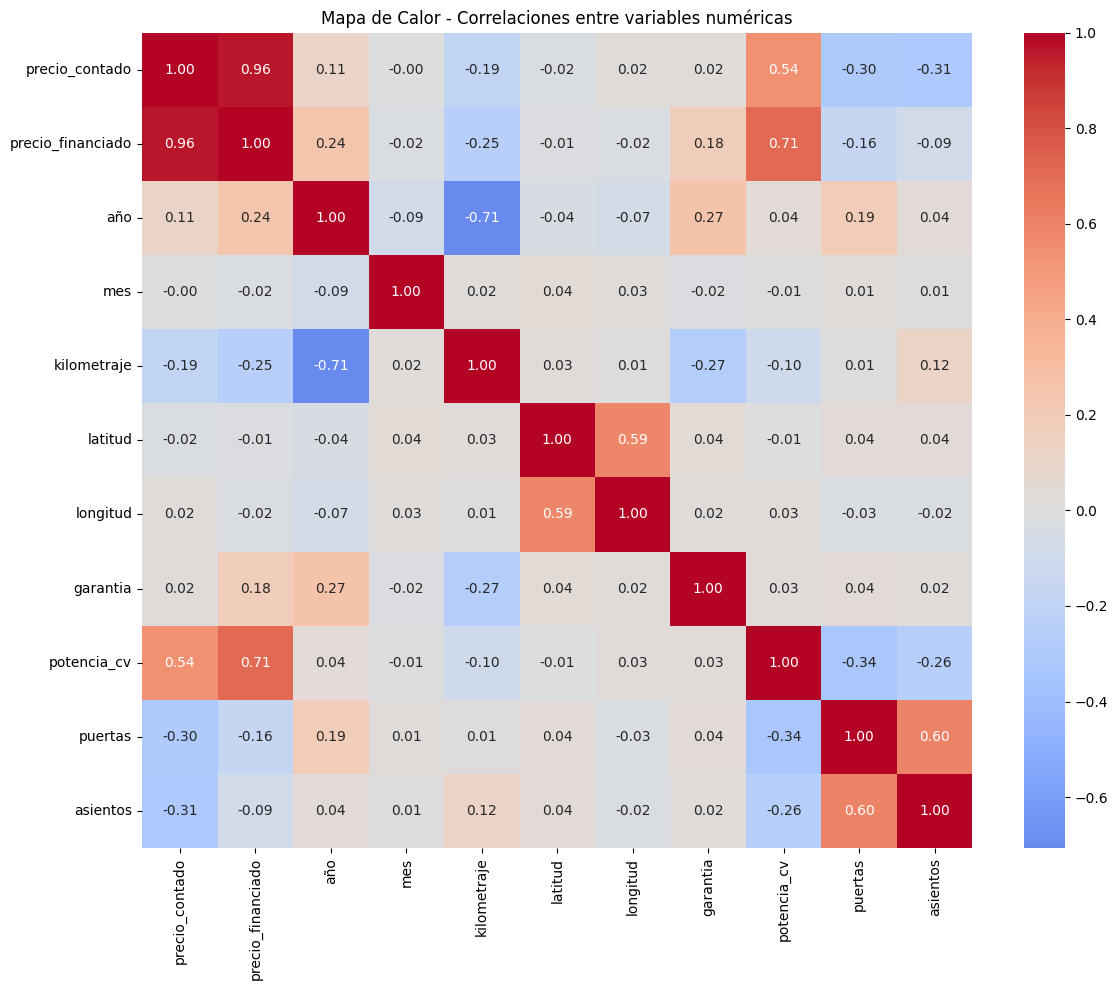

In [13]:
numeric_cols = df.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de Calor - Correlaciones entre variables numéricas')
plt.tight_layout()
plt.show()

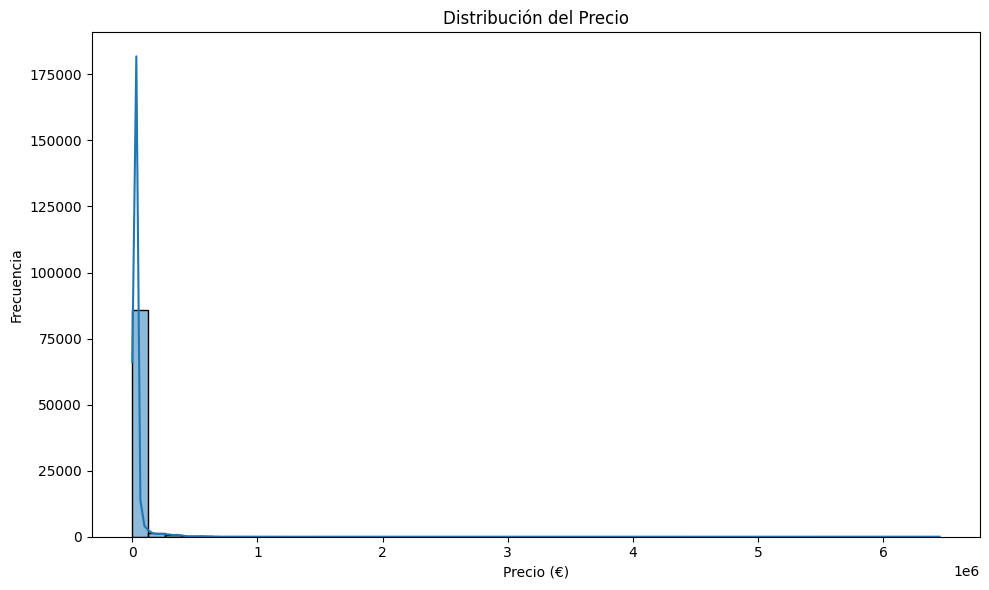

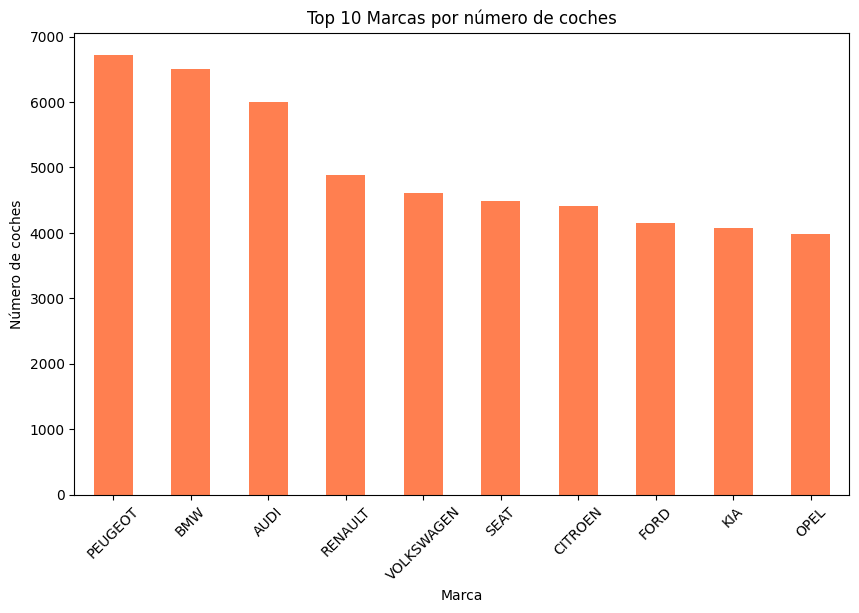

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['precio_contado'], bins=50, kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


top_marcas = df['marca'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
top_marcas.plot(kind='bar', color='coral')
plt.title('Top 10 Marcas por número de coches')
plt.xlabel('Marca')
plt.ylabel('Número de coches')
plt.xticks(rotation=45)
plt.show()

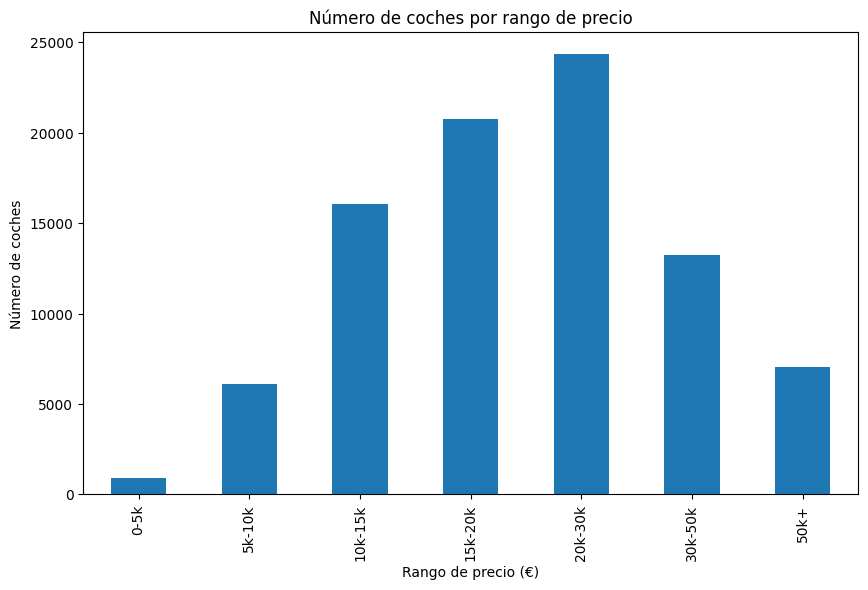

In [15]:
bins = [0, 5000, 10000, 15000, 20000, 30000, 50000, df['precio_contado'].max()]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-30k', '30k-50k', '50k+']

df['precio_rango'] = pd.cut(df['precio_contado'], bins=bins, labels=labels, include_lowest=True)


frecuencias = df['precio_rango'].value_counts().sort_index()

plt.figure(figsize=(10,6))
frecuencias.plot(kind='bar')
plt.title('Número de coches por rango de precio')
plt.xlabel('Rango de precio (€)')
plt.ylabel('Número de coches')
plt.show()


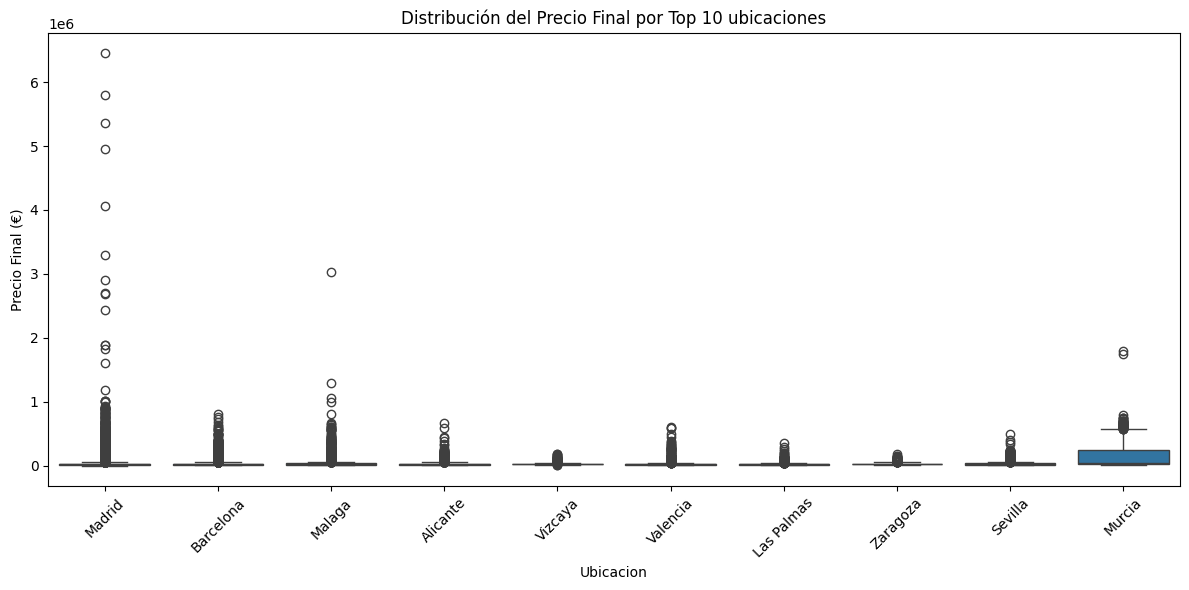

In [16]:
top_ubicacion = df['ubicacion'].value_counts().nlargest(10).index
df_top = df[df['ubicacion'].isin(top_ubicacion)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='ubicacion', y='precio_contado')
plt.title('Distribución del Precio Final por Top 10 ubicaciones')
plt.xlabel('Ubicacion')
plt.ylabel('Precio Final (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



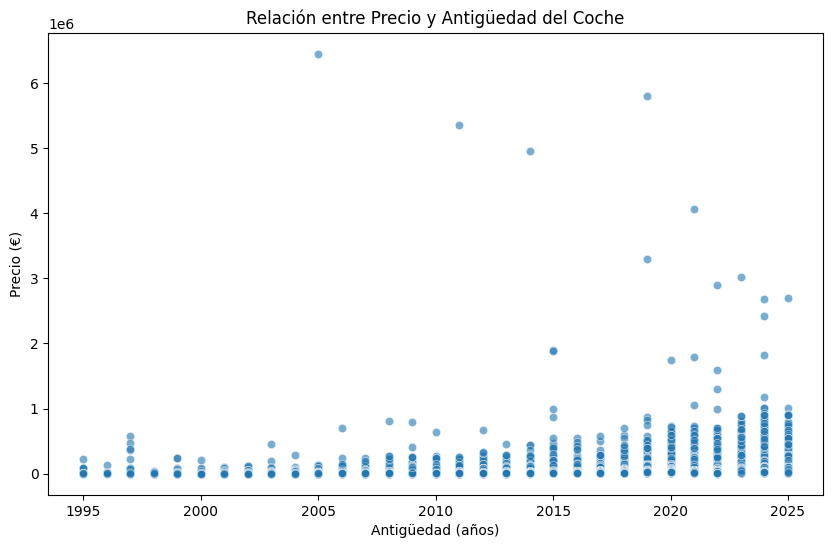

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='año', y='precio_contado', alpha=0.6)
plt.title('Relación entre Precio y Antigüedad del Coche')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Precio (€)')
plt.show()


In [18]:
df['log_precio'] = np.log1p(df['precio_contado'])


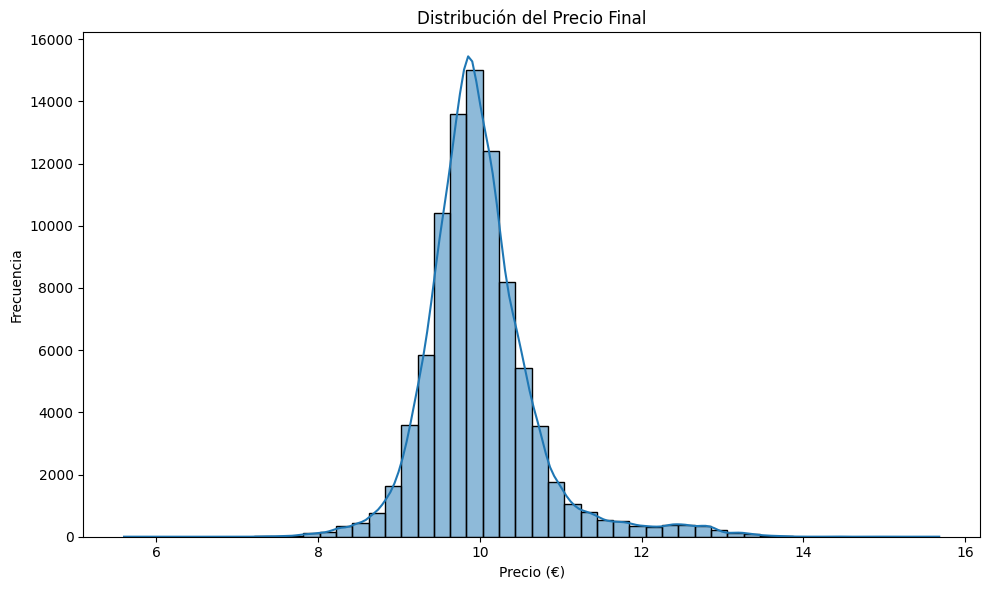

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['log_precio'], bins=50, kde=True)
plt.title('Distribución del Precio Final')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [20]:
fig = px.box(df_top, x='ubicacion', y='precio_contado', title='Precio segun las top 10 ubicaciones')
fig.show()
